In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
tf.random.set_seed(22)
C_Root = '/content/drive/MyDrive/Projects/Sudoku'

In [3]:
def load_data(filepath = None, test_ratio = 0.1):
    raw_df = pd.read_excel(filepath)
    print(raw_df.Label.value_counts())
    n_samples = min(raw_df.Label.value_counts().tolist())
    print(f'Using {n_samples} samples for each label')
    test_size = int((n_samples * test_ratio) // 1)

    df_train, df_test = pd.DataFrame(), pd.DataFrame()

    for label in raw_df.Label.unique():
        temp_df = raw_df[raw_df['Label'] == label]
        temp_df = temp_df.reset_index(drop = True)
        temp_df = temp_df.sample(frac = 1).reset_index(drop=True) 
        df_train = pd.concat([df_train, temp_df[test_size:n_samples]], axis = 0)
        df_test = pd.concat([df_test, temp_df[:test_size]], axis = 0)

    X_train = df_train.iloc[:, 1:].values
    X_test = df_test.iloc[:, 1:].values
    y_train = df_train.iloc[:, 0].values
    y_test = df_test.iloc[:, 0].values

    X_train = X_train.reshape((-1, 28, 28))
    X_test = X_test.reshape((-1, 28, 28))

    X_train = X_train / 255.0
    X_test = X_test / 255.0

    return X_train, X_test, y_train, y_test


def plot_generator():
    metrics = ['Accuracy', 'Loss']
    linetype = ['-', '--']
    fig, axes = plt.subplots(1, 2, figsize = (18, 5))
    epochs = range(len(history.history[metrics[0].lower()]))
    for i in range(len(metrics)):
        axes[i].plot(epochs, history.history[metrics[i].lower()], 'r' + linetype[i], label = 'Training')
        axes[i].plot(epochs, history.history['val_' + metrics[i].lower()], 'b' + linetype[i] , label = 'Validation')
        axes[i].set_title(metrics[i], fontsize = 16)
        axes[i].grid(True)
        axes[i].set_xlabel('Epoch')
        axes[i].set_ylabel(metrics[i])
        axes[i].legend()


def lrscheduler(epoch, lr):
  if epoch % C_Lr_Interval == C_Lr_Interval - 1:
    return lr * 0.1 
  else:
    return lr


def cb_def():
    cb = [
          tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = C_Patience, restore_best_weights = True, min_delta = 0.0001),
          tf.keras.callbacks.LearningRateScheduler(lrscheduler)
         ]
    return cb

X_train, X_test, y_train, y_test = load_data(filepath = f'{C_Root}/fulldata.xlsx', test_ratio = 0.1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

0    4758
4     290
5     289
1     285
3     284
8     282
2     278
6     277
7     276
9     271
Name: Label, dtype: int64
Using 271 samples for each label
(2440, 28, 28) (270, 28, 28) (2440,) (270,)


Epoch 1/30
58/58 [==============================] - 13s 11ms/step - loss: 1.2946 - accuracy: 0.6945 - val_loss: 6.2409 - val_accuracy: 0.1967 - lr: 0.0010
Epoch 2/30
58/58 [==============================] - 0s 5ms/step - loss: 0.3008 - accuracy: 0.9803 - val_loss: 8.2211 - val_accuracy: 0.1984 - lr: 0.0010
Epoch 3/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0999 - accuracy: 0.9967 - val_loss: 9.2424 - val_accuracy: 0.1984 - lr: 0.0010
Epoch 4/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0486 - accuracy: 0.9995 - val_loss: 9.9157 - val_accuracy: 0.2000 - lr: 0.0010
Epoch 5/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0341 - accuracy: 1.0000 - val_loss: 9.9984 - val_accuracy: 0.2000 - lr: 1.0000e-04
Epoch 6/30
58/58 [==============================] - 0s 5ms/step - loss: 0.0327 - accuracy: 0.9995 - val_loss: 10.0578 - val_accuracy: 0.2000 - lr: 1.0000e-04


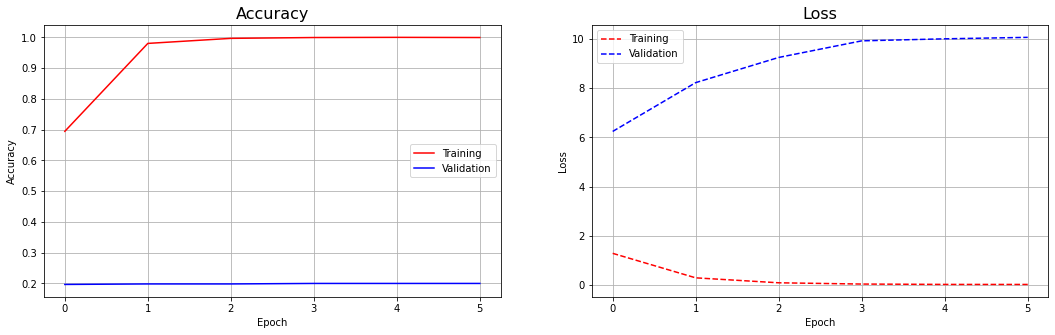

In [4]:
def build_model():
    tf.keras.backend.clear_session()
    model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(4, (3,3), activation='relu', input_shape=(28, 28, 1)),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Flatten(),
                        tf.keras.layers.Dropout(0.1),
                        tf.keras.layers.Dense(10, activation='softmax')
                        ])
    tf.keras.utils.plot_model(model, to_file = f"{C_Root}/model.png", show_layer_activations = True, show_shapes = True, show_dtype = True)
    model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
    return model

C_Patience = 5
C_Lr_Interval = 5
recognizer = build_model()
history = recognizer.fit(X_train, y_train, validation_split = 0.25, epochs = 30, verbose = 1, callbacks = cb_def())
plot_generator()

In [6]:
test_loss = recognizer.evaluate(X_test, y_test)
print(test_loss)

# recognizer.save(f'{C_Root}/DigitRecognizer')

9/9 [==============================] - 0s 5ms/step - loss: 1.9738 - accuracy: 0.7926
[1.9738037586212158, 0.7925925850868225]
